<a href="https://colab.research.google.com/github/aayalas/Python_para_Data_Science_Pandas/blob/main/Python_ML_Classification_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning: Classification with SKLearn

Class 1: Intro to the classification

In [55]:
# features 1 = yes and 0 = no
# has long hair?
# has sharp neils? 
# does meow?

dog1 = [0,1,1]
dog2 = [1,0,1]
dog3 = [1,1,1]

cat1 = [0,1,0]
cat2 = [0,1,1]
cat3 = [1,1,0]

x_train = [dog1, dog2, dog3, cat1, cat2, cat3]
y_train = [1,1,1,0,0,0]

In [56]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train,y_train)

LinearSVC()

LinearSVC()

In [57]:
mysterious_animal = [1,1,1]
model.predict([mysterious_animal])

array([1])

In [58]:
mystery1 = [1,1,1]
mystery2 = [1,1,0]
mystery3 = [0,1,1]

x_test = [mystery1, mystery2, mystery3]
y_test = [0,1,1]

forecast = model.predict(x_test)

In [59]:
hit = (forecast == y_test).sum()
total = len(x_test)
hit_rate = hit/total
print(f'The hit rate was: {round(hit_rate*100,2)}%')

The hit rate was: 33.33%


In [60]:
from sklearn.metrics import accuracy_score

hit_rate = accuracy_score(y_test, forecast)
print(f'The hit rate was: {round(hit_rate*100,2)}%')

The hit rate was: 33.33%


Class 2: Replicable tests, stratification, reading data from the Internet

In [61]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
data = pd.read_csv(uri)
data.sample(5)

,home,how_it_works,contact,bought
38,1,1,0,0
8,1,1,0,0
0,1,1,0,0
53,1,1,0,0
82,0,0,1,0


In [62]:
x = data[['home','how_it_works','contact','bought']]
x.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [63]:
y = data.bought
y.head()

0    0
1    0
2    0
3    0
4    0
Name: bought, dtype: int64

In [64]:
data.shape

(99, 4)

In [65]:
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [66]:
y_train.value_counts()

0    48
1    27
Name: bought, dtype: int64

In [67]:
24/75

0.32

In [68]:
y_test.value_counts()

0    18
1     6
Name: bought, dtype: int64

In [69]:
9/24

0.375

In [70]:
print(f"Training with {len(x_train)} elements and Test with {len(x_test)} elements")

Training with 75 elements and Test with 24 elements


In [71]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(x_train,y_train)
forecast = model.predict(x_test)

hit_rate = accuracy_score(y_test, forecast)
print(f'The hit rate was: {round(hit_rate*100,2)}%')

The hit rate was: 100.0%


In [72]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = SEED)

model = LinearSVC()
model.fit(x_train,y_train)
forecast = model.predict(x_test)

hit_rate = accuracy_score(y_test, forecast)
print(f'The hit rate was: {round(hit_rate*100,2)}%')

The hit rate was: 100.0%


In [73]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = SEED, stratify = y)

model = LinearSVC()
model.fit(x_train,y_train)
forecast = model.predict(x_test)

hit_rate = accuracy_score(y_test, forecast)
print(f'The hit rate was: {round(hit_rate*100,2)}%')

The hit rate was: 100.0%


In [74]:
y_train.value_counts()

0    49
1    25
Name: bought, dtype: int64

In [75]:
25/74

0.33783783783783783

In [76]:
y_test.value_counts()

0    17
1     8
Name: bought, dtype: int64

In [77]:
8/25

0.32

Class 3: Low Dimensionality Proyect and Baseline

In [78]:
uri = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'
data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [79]:
change = {1:0, 0:1}
data['finished'] = data.unfinished.map(change)
data.sample(5)

,unfinished,expected_hours,price,finished
1080,0,24,279,1
512,1,11,146,0
1261,1,84,9020,0
847,1,30,223,0
1197,0,70,5271,1


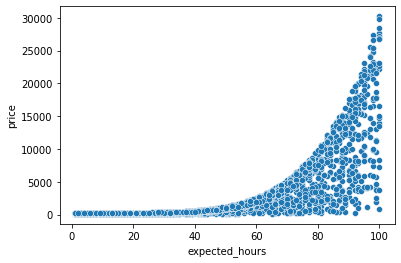

In [80]:
import seaborn as sns
sns.scatterplot(x = 'expected_hours', y = 'price', data = data);

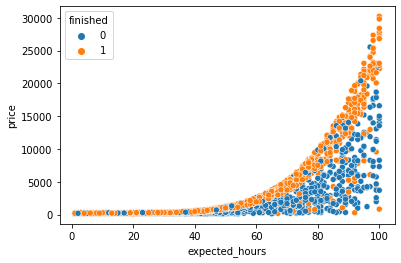

In [81]:
sns.scatterplot(x = 'expected_hours', y = 'price', hue = 'finished', data = data);

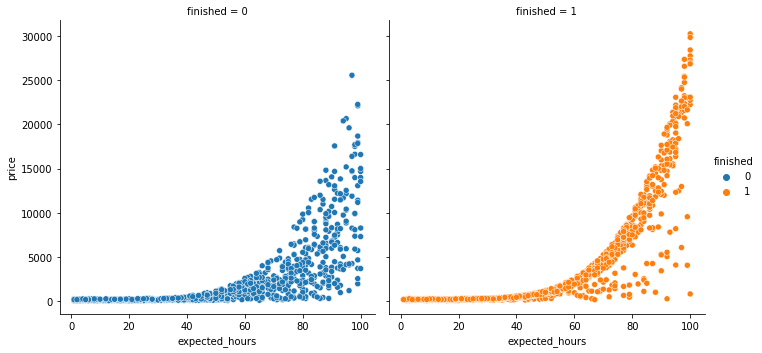

In [82]:
sns.relplot(x = 'expected_hours', y = 'price', hue = 'finished', data = data, col = 'finished');

In [83]:
import numpy as np

x = data[['expected_hours', 'price']]
y = data.finished

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, stratify = y)
print(f"Training with {len(x_train)} elements and Test with {len(x_test)} elements")

model = LinearSVC()
model.fit(x_train,y_train)
forecast = model.predict(x_test)

hit_rate = accuracy_score(y_test, forecast)
print(f'The hit rate was: {round(hit_rate*100,2)}%')

Training with 1617 elements and Test with 540 elements
The hit rate was: 57.59%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [84]:
forecast = np.ones(540)
hit_rate = accuracy_score(y_test, forecast)
print(f'The hit rate was: {round(hit_rate*100,2)}%')

The hit rate was: 52.59%


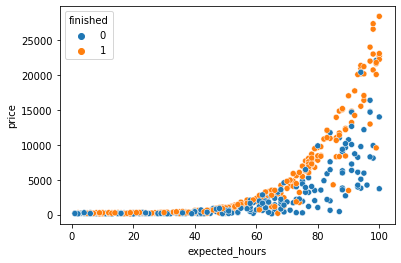

In [85]:
sns.scatterplot(x = 'expected_hours', y = 'price', hue = y_test, data = x_test);

In [86]:
x_min = x_test.expected_hours.min()
x_max = x_test.expected_hours.max()
y_min = x_test.price.min()
y_max = x_test.price.max()

In [87]:
pixels = 100
axis_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

In [88]:
xx, yy = np.meshgrid(axis_x, axis_y)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [89]:
Z = model.predict(points)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


In [90]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

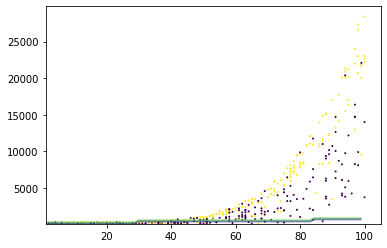

In [91]:
import matplotlib.pyplot as plt

plt.contour(xx, yy, Z, alpha = 0.3)
plt.scatter(x_test.expected_hours, x_test.price, c = y_test, s = 1);

In [92]:
# Decision Boundary

Class 4: Support Vector Machines and no linear systems

Training with 1617 elements and Test with 540 elements
The hit rate was: 67.78%


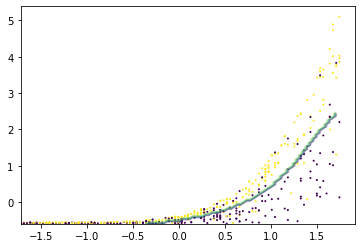

In [93]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x = data[['expected_hours', 'price']]
y = data.finished

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, stratify = y)
print(f"Training with {len(x_train)} elements and Test with {len(x_test)} elements")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
forecast = model.predict(x_test)

data_x = x_test[:,0]
data_y = x_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
axis_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
axis_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(axis_x, axis_y)
points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(points)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c = y_test, s = 1);

hit_rate = accuracy_score(y_test, forecast)
print(f'The hit rate was: {round(hit_rate*100,2)}%')

Class 5: Dummy Classifiers and Desicion Trees

In [94]:
uri = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'
data = pd.read_csv(uri)

data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [95]:
change = {'no':0, 'yes':1}
data.sold = data.sold.map(change)
data.sample(3)

,Unnamed: 0,mileage_per_year,model_year,price,sold
4062,4062,12914,2001,91492.55,0
338,338,13175,2002,77450.66,0
7900,7900,9524,2004,70029.90,0


In [96]:
from datetime import datetime

current_year = datetime.today().year
data['model_age'] = current_year - data.model_year
data.sample(3)

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
7825,7825,11850,2006,54526.09,0,16
1339,1339,7848,2003,66631.71,1,19
1685,1685,21406,2007,44578.12,1,15


In [97]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x = data[['model_age', 'mileage_per_year', 'price']]
y = data.sold

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, stratify = y)
print(f"Training with {len(raw_x_train)} elements and Test with {len(raw_x_test)} elements")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
forecast = model.predict(x_test)

hit_rate = accuracy_score(y_test, forecast)
print(f'The hit rate was: {round(hit_rate*100,2)}%')

Training with 7500 elements and Test with 2500 elements
The hit rate was: 76.04%


In [98]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(x_train, y_train)
accuracy = dummy.score(x_test, y_test)*100
print(f'The Dummy Stratified Clssifier Accuracy was {round(accuracy,2)}%')

The Dummy Stratified Clssifier Accuracy was 52.64%


In [99]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(x_train, y_train)
accuracy = dummy.score(x_test, y_test)*100
print(f'The Dummy Most Frequent Clssifier Accuracy was {round(accuracy,2)}%')

The Dummy Most Frequent Clssifier Accuracy was 58.0%


In [ ]:
#DESICION TREES

In [108]:
from sklearn.tree import DecisionTreeClassifier

x = data[['model_age', 'mileage_per_year', 'price']]
y = data.sold

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, stratify = y)
print(f"Training with {len(x_train)} elements and Test with {len(x_test)} elements")

model = DecisionTreeClassifier(max_depth = 3)
model.fit(x_train,y_train)
forecast = model.predict(x_test)

hit_rate = accuracy_score(y_test, forecast)
print(f'The hit rate was: {round(hit_rate*100,2)}%')

Training with 7500 elements and Test with 2500 elements
The hit rate was: 78.04%


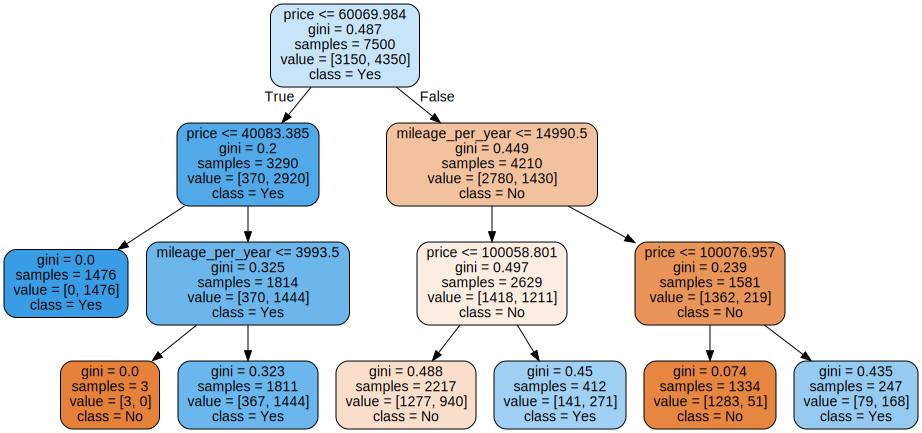

In [110]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names = features, filled = True, rounded = True, class_names = ['No','Yes'] )
graph = graphviz.Source(dot_data)
graph